In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.axes as axs

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Data Preparation

In [2]:
df_purchase = pd.read_csv('purchase data.csv')
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

#Standardisation
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
#Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
#Segment Data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

#Copy of Dataframe
df_purchase_predictors = df_purchase.copy()
#Add Segment Labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

In [3]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


---

## Purchase Probability Model

In [4]:
Y = df_pa['Incidence']

In [5]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                  df_pa['Price_2'] +
                  df_pa['Price_3'] +
                  df_pa['Price_4'] +
                  df_pa['Price_5']) / 5

In [6]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [7]:
#Decrease in price would lead to increase purchase probability
model_purchase.coef_

array([[-2.34778999]])

## Price Elasticity of Purchase Probability

In [8]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [9]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [10]:
df_price_range = pd.DataFrame(price_range)

In [11]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [12]:
purchase_pr = Y_pr[:][:, 1]

In [13]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [14]:
df_price_elasticities = pd.DataFrame(price_range)

In [15]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: 'Price_Point'})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096400
1,0.51,-0.100468
2,0.52,-0.104662
3,0.53,-0.108987
4,0.54,-0.113446
...,...,...
295,3.45,-8.011940
296,3.46,-8.037188
297,3.47,-8.062401
298,3.48,-8.087581


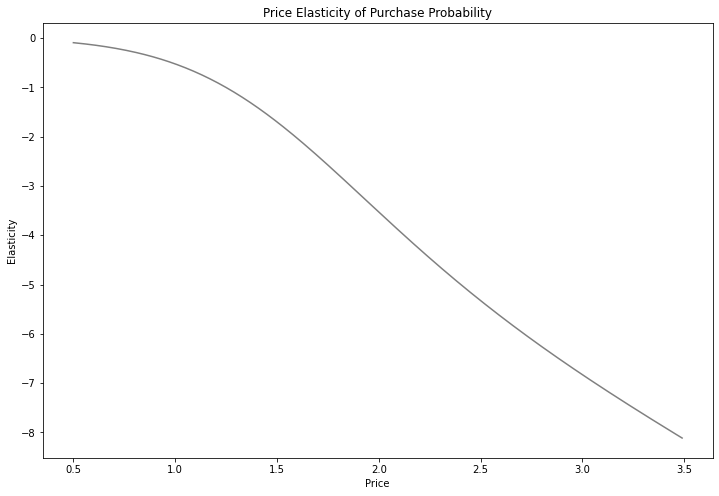

In [16]:
plt.figure(figsize = (12,8))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()
#Prices lower than 1.25 can increase product price without losing too much in terms of probability
#Prices higher than 1.25 have more to gain if they reduce their prices
#However keep in mind within the descriptive analysis Brand 5 (the most costly product) produced the most total revenue

# Purchase Probability by Segments

## Segment 0 - Standard

In [17]:
df_pa_segm_0 = df_pa[df_pa['Segment']==0]

In [18]:
Y = df_pa_segm_0['Incidence']

In [19]:
X = pd.DataFrame()

In [20]:
X['Mean_Price'] = (df_pa_segm_0['Price_1'] +
                  df_pa_segm_0['Price_2'] +
                  df_pa_segm_0['Price_3'] +
                  df_pa_segm_0['Price_4'] +
                  df_pa_segm_0['Price_5']) / 5

In [21]:
model_incidence_segm_0 = LogisticRegression(solver = 'sag')
model_incidence_segm_0.fit(X,Y)

LogisticRegression(solver='sag')

In [22]:
model_incidence_segm_0.coef_

array([[-1.50792238]])

In [23]:
Y_segm_0 = model_incidence_segm_0.predict_proba(df_price_range)
purchase_pr_segm_0 = Y_segm_0[:][:, 1]
pe_segm_0 = model_incidence_segm_0.coef_[:, 0] * price_range * (1 - purchase_pr_segm_0)

In [24]:
df_price_elasticities['PE_Segment_0'] = pe_segm_0
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0
0,0.50,-0.096400,-0.211129
1,0.51,-0.100468,-0.217697
2,0.52,-0.104662,-0.224373
3,0.53,-0.108987,-0.231157
4,0.54,-0.113446,-0.238051
...,...,...,...
295,3.45,-8.011940,-5.050437
296,3.46,-8.037188,-5.067290
297,3.47,-8.062401,-5.084125
298,3.48,-8.087581,-5.100941


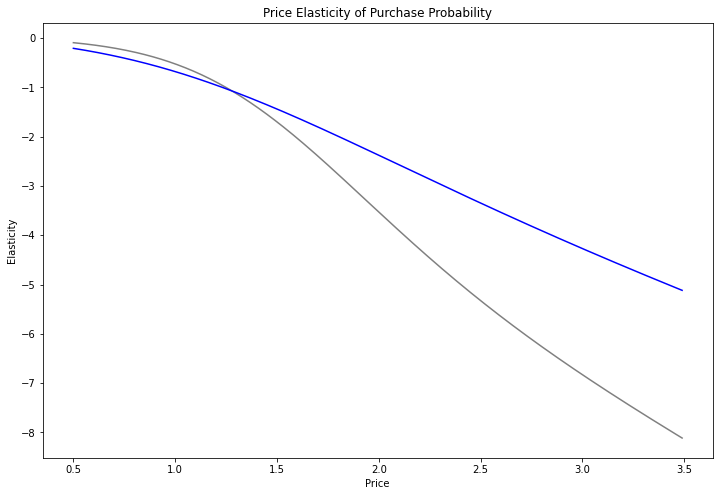

In [25]:
plt.figure(figsize = (12,8))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segm_0, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

## Segment 1 - Career Focused

In [26]:
df_pa_segm_1 = df_pa[df_pa['Segment']==1]

In [27]:
Y = df_pa_segm_1['Incidence']

In [28]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segm_1['Price_1'] +
                  df_pa_segm_1['Price_2'] +
                  df_pa_segm_1['Price_3'] +
                  df_pa_segm_1['Price_4'] +
                  df_pa_segm_1['Price_5']) / 5

In [29]:
model_incidence_segm_1 = LogisticRegression(solver = 'sag')
model_incidence_segm_1.fit(X,Y)

LogisticRegression(solver='sag')

In [30]:
model_incidence_segm_1.coef_

array([[-1.7117676]])

In [31]:
Y_segm_1 = model_incidence_segm_1.predict_proba(df_price_range)
purchase_pr_segm_1 = Y_segm_1[:][:, 1]
pe_segm_1 = model_incidence_segm_1.coef_[:, 0] * price_range * (1 - purchase_pr_segm_1)

In [32]:
df_price_elasticities['PE_Segment_1'] = pe_segm_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1
0,0.50,-0.096400,-0.211129,-0.119079
1,0.51,-0.100468,-0.217697,-0.123262
2,0.52,-0.104662,-0.224373,-0.127537
3,0.53,-0.108987,-0.231157,-0.131908
4,0.54,-0.113446,-0.238051,-0.136375
...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266
296,3.46,-8.037188,-5.067290,-5.700422
297,3.47,-8.062401,-5.084125,-5.720542
298,3.48,-8.087581,-5.100941,-5.740624


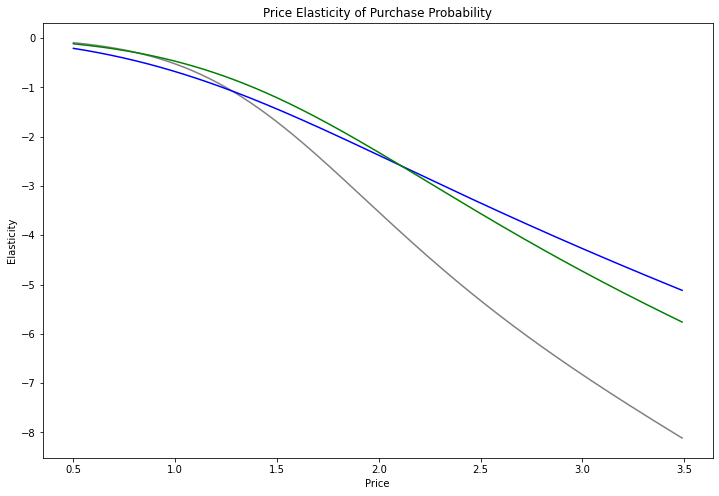

In [33]:
plt.figure(figsize = (12,8))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segm_0, color = 'b')
plt.plot(price_range, pe_segm_1, color = 'g')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

## Segment 2 - Fewer Opportunities

In [34]:
df_pa_segm_2 = df_pa[df_pa['Segment']==2]

In [35]:
Y = df_pa_segm_2['Incidence']

In [36]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segm_2['Price_1'] +
                  df_pa_segm_2['Price_2'] +
                  df_pa_segm_2['Price_3'] +
                  df_pa_segm_2['Price_4'] +
                  df_pa_segm_2['Price_5']) / 5

In [37]:
model_incidence_segm_2 = LogisticRegression(solver = 'sag')
model_incidence_segm_2.fit(X,Y)

LogisticRegression(solver='sag')

In [38]:
model_incidence_segm_2.coef_

array([[-3.63962699]])

In [39]:
Y_segm_2 = model_incidence_segm_2.predict_proba(df_price_range)
purchase_pr_segm_2 = Y_segm_2[:][:, 1]
pe_segm_2 = model_incidence_segm_2.coef_[:, 0] * price_range * (1 - purchase_pr_segm_2)

In [40]:
df_price_elasticities['PE_Segment_2'] = pe_segm_2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535
...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647


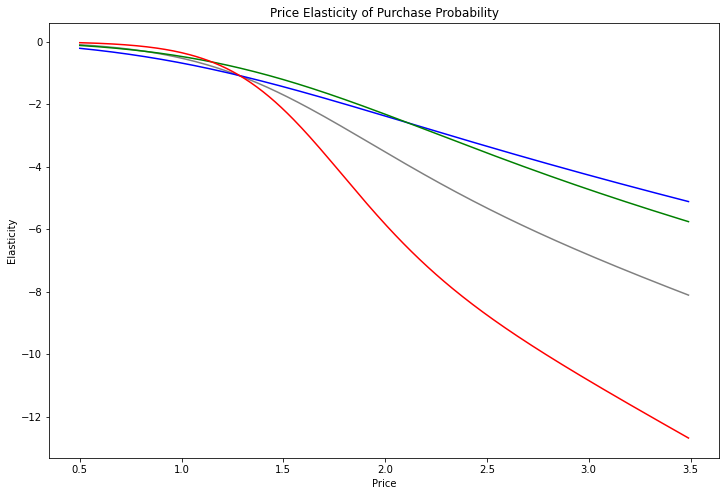

In [41]:
plt.figure(figsize = (12,8))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segm_0, color = 'b')
plt.plot(price_range, pe_segm_1, color = 'g')
plt.plot(price_range, pe_segm_2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

## Segment 3 - Well-off

In [42]:
df_pa_segm_3 = df_pa[df_pa['Segment']==3]

In [43]:
Y = df_pa_segm_3['Incidence']

In [44]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segm_3['Price_1'] +
                  df_pa_segm_3['Price_2'] +
                  df_pa_segm_3['Price_3'] +
                  df_pa_segm_3['Price_4'] +
                  df_pa_segm_3['Price_5']) / 5

In [45]:
model_incidence_segm_3 = LogisticRegression(solver = 'sag')
model_incidence_segm_3.fit(X,Y)

LogisticRegression(solver='sag')

In [46]:
model_incidence_segm_3.coef_

array([[-1.24613327]])

In [47]:
Y_segm_3 = model_incidence_segm_3.predict_proba(df_price_range)
purchase_pr_segm_3 = Y_segm_3[:][:, 1]
pe_segm_3 = model_incidence_segm_3.coef_[:, 0] * price_range * (1 - purchase_pr_segm_3)

In [48]:
df_price_elasticities['PE_Segment_3'] = pe_segm_3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292
...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093


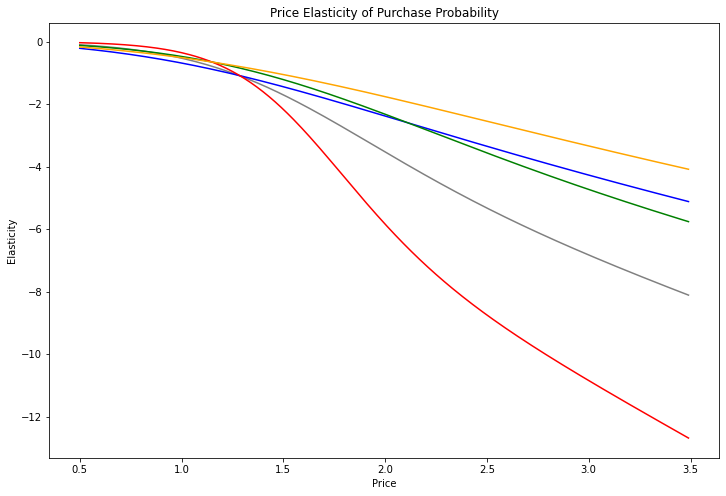

In [49]:
plt.figure(figsize = (12,8))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segm_0, color = 'b')
plt.plot(price_range, pe_segm_1, color = 'g')
plt.plot(price_range, pe_segm_2, color = 'r')
plt.plot(price_range, pe_segm_3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

# Purchase Probability with Promotion Feature

In [50]:
Y = df_pa['Incidence']

In [51]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                  df_pa['Price_2'] +
                  df_pa['Price_3'] +
                  df_pa['Price_4'] +
                  df_pa['Price_5']) / 5

In [52]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                      df_pa['Promotion_2'] +
                      df_pa['Promotion_3'] +
                      df_pa['Promotion_4'] +
                      df_pa['Promotion_5']) / 5

In [53]:
X

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


## Model Estimation

In [54]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49401303,  0.56153105]])

## Price Elasticity with Promotion

In [55]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: 'Price_range'})

In [56]:
df_price_elasticity_promotion['Promotions'] = 1

In [57]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [58]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:,0] * price_range) * (1 - promo)

In [59]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688
...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117


## Price Elasticity without Promotion

In [60]:
df_price_elasticity_no_promotion = pd.DataFrame(price_range)
df_elasticity_no_promotion = df_price_elasticity_no_promotion.rename(columns = {0: 'Price_range'})

In [61]:
df_price_elasticity_no_promotion['Promotions'] = 0

In [62]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_no_promotion)

In [63]:
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [64]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

In [65]:
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767
...,...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604,-4.983208
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806,-5.000114
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977,-5.017000
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117,-5.033866


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

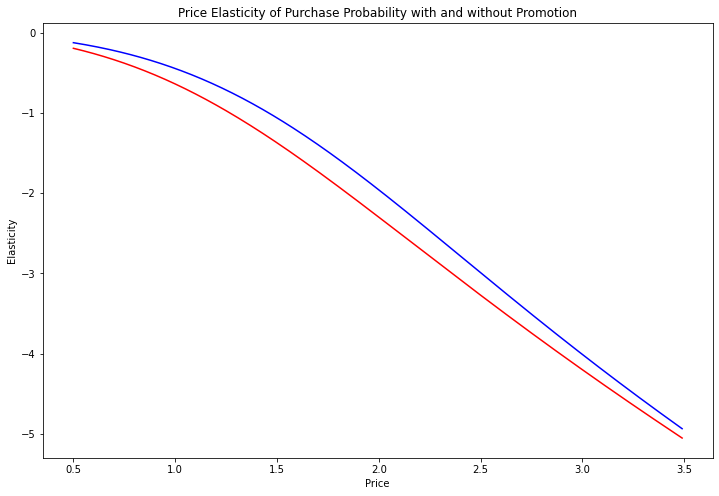

In [66]:
plt.figure(figsize = (12, 8))
plt.plot(price_range, price_elasticity_no_promo, color = 'r')
plt.plot(price_range, price_elasticity_promo, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

---

# Brand Choice

In [67]:
brand_choice = df_pa[df_pa['Incidence'] == 1]
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [68]:
Y = brand_choice['Brand']

In [69]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [70]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [71]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [72]:
model_brand_choice.coef_

array([[-3.91592814,  0.65847093,  2.41782129,  0.70410528, -0.20207743],
       [ 1.27462377, -1.87985146, -0.21261058, -0.20633281,  0.58788128],
       [ 1.62412247,  0.56208475,  0.50067248,  1.03946215,  0.45272095],
       [ 0.57455052,  0.39559303, -1.40056584, -1.24623519,  0.24936408],
       [ 0.44263138,  0.26370276, -1.30531734, -0.29099943, -1.08788889]])

In [73]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915928,0.658471,2.417821,0.704105,-0.202077
1,1.274624,-1.879851,-0.212611,-0.206333,0.587881
2,1.624122,0.562085,0.500672,1.039462,0.452721
3,0.574551,0.395593,-1.400566,-1.246235,0.249364
4,0.442631,0.263703,-1.305317,-0.290999,-1.087889


In [74]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 2
hypothetical scenario we are brand 2

In [75]:
df_own_brand_2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_2['Price_2'] = price_range
df_own_brand_2['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_2['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_2['Price_5'] = brand_choice['Price_5'].mean()
df_own_brand_2

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,0.50,2.006694,2.159658,2.654296
1,1.384559,0.51,2.006694,2.159658,2.654296
2,1.384559,0.52,2.006694,2.159658,2.654296
3,1.384559,0.53,2.006694,2.159658,2.654296
4,1.384559,0.54,2.006694,2.159658,2.654296
...,...,...,...,...,...
295,1.384559,3.45,2.006694,2.159658,2.654296
296,1.384559,3.46,2.006694,2.159658,2.654296
297,1.384559,3.47,2.006694,2.159658,2.654296
298,1.384559,3.48,2.006694,2.159658,2.654296


In [76]:
predict_brand_2 = model_brand_choice.predict_proba(df_own_brand_2)

In [77]:
pr_own_brand_2 = predict_brand_2[:, 1]

In [78]:
beta2 = bc_coef.iloc[1,1]
beta2

-1.88

In [79]:
own_price_elasticity_brand_2 = beta2 * price_range * (1 - pr_own_brand_2)

In [80]:
df_price_elasticities['Brand_2'] = own_price_elasticity_brand_2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662,-0.109608
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784,-0.114025
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008,-0.118568
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336,-0.123241
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767,-0.128045
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604,-4.983208,-6.424124
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806,-5.000114,-6.444137
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977,-5.017000,-6.464127
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117,-5.033866,-6.484095


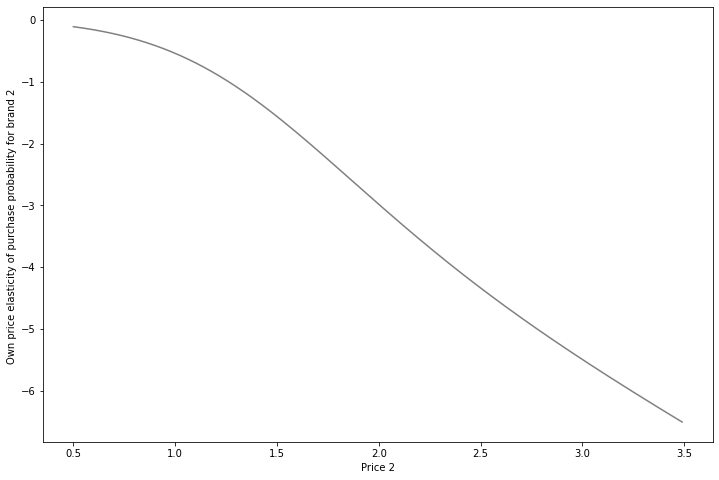

In [81]:
plt.figure(figsize = (12,8))
plt.plot(price_range, own_price_elasticity_brand_2, color = 'grey')
plt.xlabel('Price 2')
plt.ylabel('Own price elasticity of purchase probability for brand 2 ')
plt.show()

## Cross Price Elasticity Brand 2, Cross Brand 1

In [82]:
df_brand2_cross_brand1 =pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1['Price_1'] = price_range
df_brand2_cross_brand1['Price_2'] = brand_choice['Price_2'].mean()
df_brand2_cross_brand1['Price_3'] = brand_choice['Price_3'].mean()
df_brand2_cross_brand1['Price_4'] = brand_choice['Price_4'].mean()
df_brand2_cross_brand1['Price_5'] = brand_choice['Price_5'].mean()
df_brand2_cross_brand1.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,0.50,1.764717,2.006694,2.159658,2.654296
1,0.51,1.764717,2.006694,2.159658,2.654296
2,0.52,1.764717,2.006694,2.159658,2.654296
3,0.53,1.764717,2.006694,2.159658,2.654296
4,0.54,1.764717,2.006694,2.159658,2.654296


In [83]:
predict_brand2_cross_brand1 = model_brand_choice.predict_proba(df_brand2_cross_brand1)

In [84]:
pr_brand_1 = predict_brand2_cross_brand1[:][:,0]

In [85]:
beta2

-1.88

In [86]:
brand2_cross_brand1_price_elasticity = -beta2 * price_range * pr_brand_1

In [87]:
df_price_elasticities['Brand_2_Cross_Brand1'] = brand2_cross_brand1_price_elasticity
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand1
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662,-0.109608,0.800749
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784,-0.114025,0.811103
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008,-0.118568,0.821047
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336,-0.123241,0.830566
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767,-0.128045,0.839647


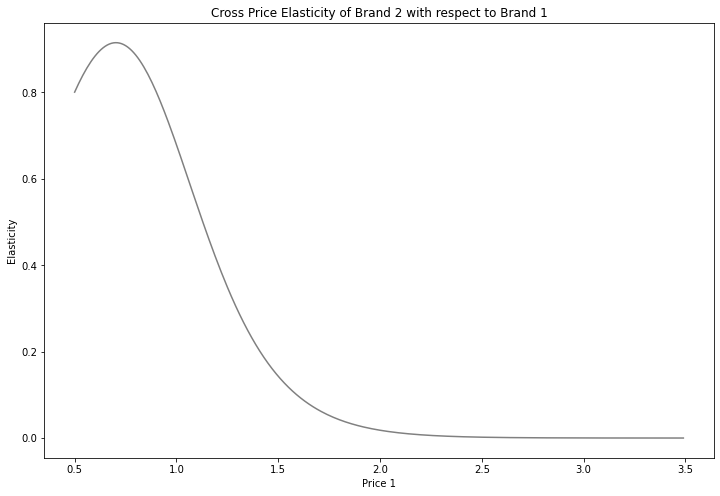

In [88]:
plt.figure(figsize = (12,8))
plt.plot(price_range, brand2_cross_brand1_price_elasticity, color = 'grey')
plt.xlabel('Price 1')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 2 with respect to Brand 1')
plt.show()
#Increase in price for brand 1 the purchase probability for brand 2 increases rapidly 

In [89]:
df_pa[['Price_1', 'Price_2']].describe()

,Price_1,Price_2
count,58693.000000,58693.000000
mean,1.392074,1.780999
std,0.091139,0.170868
min,1.100000,1.260000
25%,1.340000,1.580000
50%,1.390000,1.880000
75%,1.470000,1.890000
max,1.590000,1.900000


## Own and Cross-Price Elasticity by Segment

### Standard

In [90]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,200000498,579,1,3,5,3,1,1.22,1.89,2.01,...,29,1,114784,1,0,0,1,0,0,0
58444,200000498,626,1,3,3,0,0,1.48,1.57,2.06,...,29,1,114784,1,0,0,1,0,0,0
58450,200000498,657,1,2,5,0,0,1.26,1.88,2.06,...,29,1,114784,1,0,0,1,0,0,0
58453,200000498,675,1,2,5,0,0,1.42,1.85,2.06,...,29,1,114784,1,0,0,1,0,0,0


In [91]:
# model estimation
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s0.fit(X,Y)

#Coefficients table for segment 0
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.01,1.09,1.19,0.27,0.47
Price_2,0.75,-2.06,0.46,0.37,0.48
Price_3,1.20,-0.50,0.36,-0.06,-1.00
Price_4,0.44,-0.28,0.99,-1.25,0.11
Price_5,-0.07,1.40,0.68,-0.86,-1.15


### Own Brand Price Elasticity

In [92]:
df_own_brand_2_s0 =pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_2_s0['Price_2'] = price_range
df_own_brand_2_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_2_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_2_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_own_brand_2_s0 = model_brand_choice_s0.predict_proba(df_own_brand_2_s0)
pr_own_brand_2_s0 = predict_own_brand_2_s0[:][:,1]

own_price_elasticity_brand_2_s0 = beta2 * price_range * (1-pr_own_brand_2_s0)
df_price_elasticities['Brand 2 S0'] = own_price_elasticity_brand_2_s0

### Cross Brand Price Elasticity

In [93]:
df_brand2_cross_brand1_s0 =pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1_s0['Price_1'] = price_range
df_brand2_cross_brand1_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand2_cross_brand1_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand2_cross_brand1_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_brand2_cross_brand1_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand2_cross_brand1_s0 = model_brand_choice_s0.predict_proba(df_brand2_cross_brand1_s0)
pr_cross_brand_2_s0 = predict_brand2_cross_brand1_s0[:][:,0]

brand2_cross_brand1_price_elasticity_s0 = -beta2 * price_range * pr_cross_brand_2_s0
df_price_elasticities['Brand_2_Cross_Brand1_S0'] = brand2_cross_brand1_price_elasticity_s0
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand1,Brand 2 S0,Brand_2_Cross_Brand1_S0
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662,-0.109608,0.800749,-0.060507,0.830792
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784,-0.114025,0.811103,-0.063226,0.843593
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008,-0.118568,0.821047,-0.066040,0.856130
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336,-0.123241,0.830566,-0.068950,0.868391
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767,-0.128045,0.839647,-0.071960,0.880370
...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604,-4.983208,-6.424124,0.000023,-6.443602,0.000407
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806,-5.000114,-6.444137,0.000022,-6.463379,0.000392
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977,-5.017000,-6.464127,0.000021,-6.483135,0.000377
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117,-5.033866,-6.484095,0.000020,-6.502869,0.000363


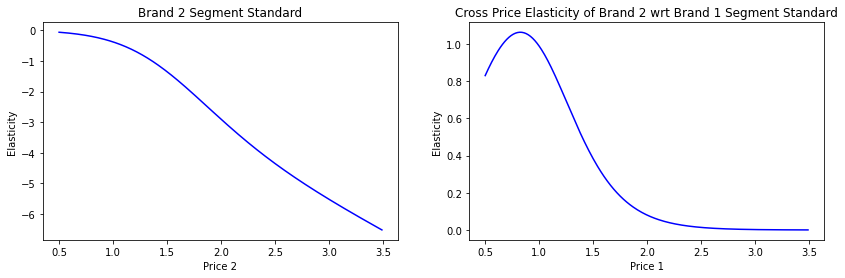

In [94]:
fig, axs = plt.subplots(1,2, figsize = (14,4))
axs[0].plot(price_range, own_price_elasticity_brand_2_s0, color = 'b')
axs[0].set_title('Brand 2 Segment Standard')
axs[0].set_xlabel('Price 2')

axs[1].plot(price_range, brand2_cross_brand1_price_elasticity_s0, color = 'b')
axs[1].set_title('Cross Price Elasticity of Brand 2 wrt Brand 1 Segment Standard')
axs[1].set_xlabel('Price 1')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

In [95]:
df_pa[['Price_1', 'Price_2']].describe()

,Price_1,Price_2
count,58693.000000,58693.000000
mean,1.392074,1.780999
std,0.091139,0.170868
min,1.100000,1.260000
25%,1.340000,1.580000
50%,1.390000,1.880000
75%,1.470000,1.890000
max,1.590000,1.900000


---

# Price Elasticity of Purchase Quantity

In [96]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [97]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [99]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                          df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                          df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                          df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                          df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [100]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                          df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                          df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                          df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                          df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation Linear Regression

In [101]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
X.head()

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0


In [102]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [103]:
model_quantity = LinearRegression()
model_quantity.fit(X,Y)

LinearRegression()

In [104]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [105]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [106]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684959

In [107]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [108]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [109]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand1,Brand 2 S0,Brand_2_Cross_Brand1_S0,PE_Quantity_Promotion_1
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662,-0.109608,0.800749,-0.060507,0.830792,-0.102157
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784,-0.114025,0.811103,-0.063226,0.843593,-0.104413
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008,-0.118568,0.821047,-0.066040,0.856130,-0.106679
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336,-0.123241,0.830566,-0.068950,0.868391,-0.108954
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767,-0.128045,0.839647,-0.071960,0.880370,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604,-4.983208,-6.424124,0.000023,-6.443602,0.000407,-1.774292
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806,-5.000114,-6.444137,0.000022,-6.463379,0.000392,-1.788634
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977,-5.017000,-6.464127,0.000021,-6.483135,0.000377,-1.803124
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117,-5.033866,-6.484095,0.000020,-6.502869,0.000363,-1.817766


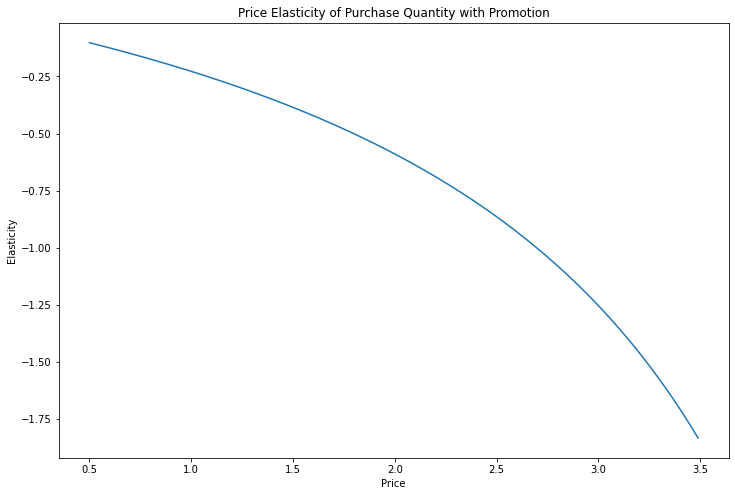

In [110]:
plt.figure(figsize = (12,8))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')
plt.show()

## Price Elasticity without promotion

In [111]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand1,Brand 2 S0,Brand_2_Cross_Brand1_S0,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662,-0.109608,0.800749,-0.060507,0.830792,-0.102157,-0.099543
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784,-0.114025,0.811103,-0.063226,0.843593,-0.104413,-0.101736
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008,-0.118568,0.821047,-0.066040,0.856130,-0.106679,-0.103939
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336,-0.123241,0.830566,-0.068950,0.868391,-0.108954,-0.106150
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767,-0.128045,0.839647,-0.071960,0.880370,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604,-4.983208,-6.424124,0.000023,-6.443602,0.000407,-1.774292,-1.664290
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806,-5.000114,-6.444137,0.000022,-6.463379,0.000392,-1.788634,-1.677205
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977,-5.017000,-6.464127,0.000021,-6.483135,0.000377,-1.803124,-1.690246
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117,-5.033866,-6.484095,0.000020,-6.502869,0.000363,-1.817766,-1.703414


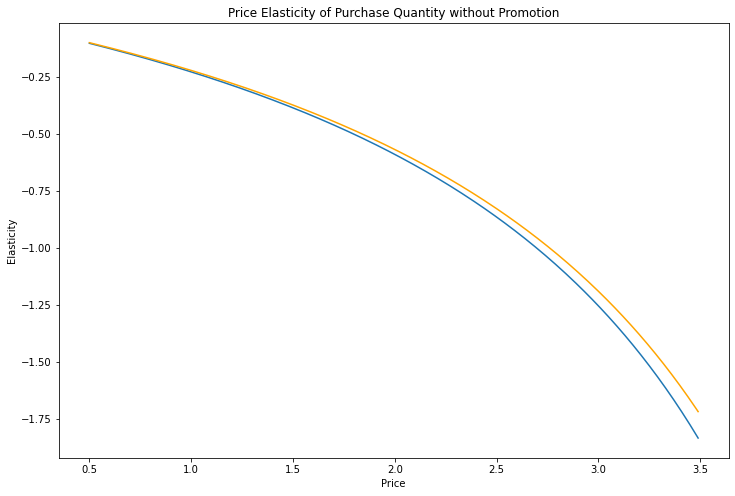

In [112]:
plt.figure(figsize = (12, 8))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.plot(price_range, price_elasticity_quantity_promotion_no, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity without Promotion')
plt.show()

## Price Elasticity with promotion Segment Standard

In [113]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence', 'Segment']]
Y = df_purchase_quantity['Quantity']

In [114]:
model_quantity = LinearRegression()
model_quantity.fit(X,Y)
model_quantity.coef_

array([-0.81411617, -0.10474182,  0.04833595])

In [115]:
df_price_elasticity_quantity['Promotion_Incidence'] = 1
df_price_elasticity_quantity['Segment'] = 0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_yes_s0 = beta_quantity * price_range / predict_quantity
df_price_elasticities['PE_Quantity_Promotion_1_s0'] = price_elasticity_quantity_promotion_yes_s0
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand1,Brand 2 S0,Brand_2_Cross_Brand1_S0,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0,PE_Quantity_Promotion_1_s0
0,0.50,-0.096400,-0.211129,-0.119079,-0.030928,-0.168155,-0.125744,-0.195662,-0.109608,0.800749,-0.060507,0.830792,-0.102157,-0.099543,-0.104279
1,0.51,-0.100468,-0.217697,-0.123262,-0.032696,-0.173083,-0.129861,-0.201784,-0.114025,0.811103,-0.063226,0.843593,-0.104413,-0.101736,-0.106586
2,0.52,-0.104662,-0.224373,-0.127537,-0.034550,-0.178082,-0.134056,-0.208008,-0.118568,0.821047,-0.066040,0.856130,-0.106679,-0.103939,-0.108903
3,0.53,-0.108987,-0.231157,-0.131908,-0.036495,-0.183151,-0.138332,-0.214336,-0.123241,0.830566,-0.068950,0.868391,-0.108954,-0.106150,-0.111229
4,0.54,-0.113446,-0.238051,-0.136375,-0.038535,-0.188292,-0.142688,-0.220767,-0.128045,0.839647,-0.071960,0.880370,-0.111238,-0.108369,-0.113565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011940,-5.050437,-5.680266,-12.540952,-4.023535,-4.861604,-4.983208,-6.424124,0.000023,-6.443602,0.000407,-1.774292,-1.664290,-1.858289
296,3.46,-8.037188,-5.067290,-5.700422,-12.577867,-4.038404,-4.879806,-5.000114,-6.444137,0.000022,-6.463379,0.000392,-1.788634,-1.677205,-1.873728
297,3.47,-8.062401,-5.084125,-5.720542,-12.614765,-4.053256,-4.897977,-5.017000,-6.464127,0.000021,-6.483135,0.000377,-1.803124,-1.690246,-1.889334
298,3.48,-8.087581,-5.100941,-5.740624,-12.651647,-4.068093,-4.916117,-5.033866,-6.484095,0.000020,-6.502869,0.000363,-1.817766,-1.703414,-1.905110


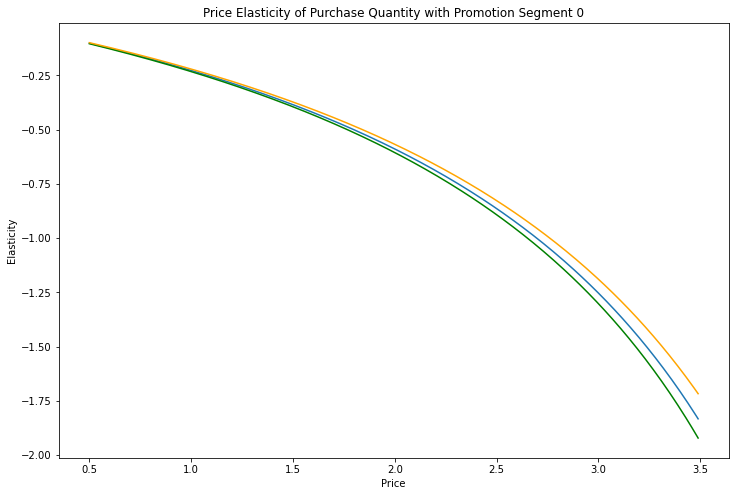

In [116]:
plt.figure(figsize = (12, 8))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.plot(price_range, price_elasticity_quantity_promotion_yes_s0, color = 'green')
plt.plot(price_range, price_elasticity_quantity_promotion_no, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion Segment 0')
plt.show()